<a href="https://colab.research.google.com/github/ItzOge/Test2Hamoye/blob/master/StageC_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing library
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

In [3]:
#drop the stab column
df = df.drop(columns=['stab'])

In [5]:
#generating the dependent and independent variables
X = df.drop(columns='stabf')
y = df['stabf']

In [8]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
y_test.value_counts()


unstable    1288
stable       712
Name: stabf, dtype: int64

In [10]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [11]:
#using StandardScaler for transformation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
x_trained_scaled_df = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [14]:
#Question15 Using randomForest to train our data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_trained_scaled_df,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [15]:
rfc_y_pred = rfc.predict(x_test_scaled_df)

In [16]:

from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,rfc_y_pred,digits=4))

              precision    recall  f1-score   support

      stable     0.9191    0.8778    0.8980       712
    unstable     0.9341    0.9573    0.9456      1288

    accuracy                         0.9290      2000
   macro avg     0.9266    0.9176    0.9218      2000
weighted avg     0.9288    0.9290    0.9286      2000



In [18]:
accuracy_rfc = accuracy_score(y_test,rfc_y_pred).round(4)
accuracy_rfc

0.929

In [19]:
#Question17 Using XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)


In [20]:
xgb.fit(x_trained_scaled_df,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
xgb_y_pred = xgb.predict(x_test_scaled_df)

In [22]:
accuracy_xgb = accuracy_score(y_test,xgb_y_pred).round(4)
accuracy_xgb

0.9195

In [23]:
#Question16. Using Lightgbm
from lightgbm  import LGBMClassifier
lgbm = LGBMClassifier(random_state =1)

In [24]:
lgbm.fit(x_trained_scaled_df,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [25]:
lgbm_y_pred = lgbm.predict(x_test_scaled_df)

In [26]:
accuracy_lgbm = accuracy_score(y_test,lgbm_y_pred).round(4)
accuracy_lgbm

0.9375

In [27]:
#2 Using Extra Tree Classification
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=1)

In [28]:
etc.fit(x_trained_scaled_df,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [38]:
etc_y_pred = etc.predict(x_test_scaled_df)

In [39]:
#Question 20
feature_importance = etc.feature_importances_ 

<BarContainer object of 12 artists>

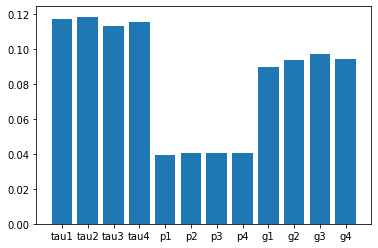

In [41]:
import matplotlib.pyplot as plt 
plt.bar(X.columns, feature_importance) 

In [37]:
#5. Improving ExtraTreeClassifier using randomized Tree Search
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}
rsc = RandomizedSearchCV(ExtraTreesClassifier(random_state=1, n_jobs = -1, verbose = 1,criterion=5),hyperparameter_grid,random_state=1)

In [31]:
rsc.fit(x_trained_scaled_df,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                     